Reference: HVass Labs Tensorflow tutorials

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [2]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [3]:
#MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [13]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

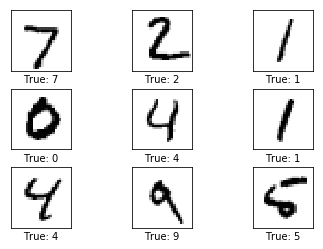

In [14]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
data.test.cls = np.array([label.argmax() for label in data.test.labels])
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [10]:
data.train.labels[0:2][:]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [16]:
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

In [29]:
x = tf.placeholder(tf.float32, [None, img_size_flat])

In [31]:
y_true = tf.placeholder(tf.float32, [None, num_classes])

In [50]:
y_true_cls = tf.placeholder(tf.int64, [None])

In [35]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))

In [36]:
biases = tf.Variable(tf.zeros([num_classes]))

In [38]:
logits = tf.matmul(x, weights) + biases

In [40]:
y_pred = tf.nn.softmax(logits)

In [42]:
y_pred_cls = tf.argmax(y_pred, dimension = 1)

In [44]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_true)

In [46]:
cost = tf.reduce_mean(cross_entropy)

In [48]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)

In [52]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [53]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [55]:
session = tf.Session()

In [57]:
session.run(tf.global_variables_initializer())

In [59]:
batch_size = 100

In [17]:
x_batch, y_true_batch = data.train.next_batch(64)

In [22]:
np.shape(y_true_batch)

(64, 10)

In [62]:
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch, y_true : y_true_batch}
        session.run(optimizer, feed_dict = feed_dict_train)

In [64]:
feed_dict_test = {x: data.test.images,
                 y_true: data.test.labels,
                 y_true_cls: data.test.cls}

In [71]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [67]:
def print_confusion_matrix():
    cls_true = data.test.cls
    cls_pred = session.run(y_pred_cls, feed_dict = feed_dict_test)
    cm = confusion_matrix(y_true = cls_true, y_pred = cls_pred)
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel("Predicted")
    plt.ylabel("True")

In [69]:
def plot_weights():
    w = session.run(weights)
    
    w_min = np.min(w)
    w_max = np.max(w)
    
    fig, axes = plt.subplots(3,4)
    fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    for i, ax in enumerate(axes.flat):
        if(i<10):
            image = w[:,i].reshape(img_shape)
            ax.set_xlabel("Weights: {0}".format(i))
            ax.imshow(image, vmin = w_min, vmax = w_max, cmap = 'seismic')
        
        ax.set_xticks([])
        ax.set_yticks([])

In [73]:
print_accuracy()

Accuracy on test-set: 9.8%


In [77]:
optimize(num_iterations = 5)
print_accuracy()

Accuracy on test-set: 81.4%


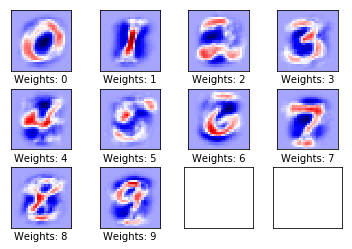

In [79]:
plot_weights()

In [80]:
session.close()